In [1]:
from gensim.models import Word2Vec
import gensim
import json
import multiprocessing
import gensim as g
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt # vizualizare dendograma
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from sklearn.metrics.pairwise import euclidean_distances

In [43]:
def create_and_train_model(fileIn):
    r = open(fileIn,'r',encoding='utf-8')
    fos_list = json.load(r)
    model_dict = []
    
    for fos in fos_list:
        model_dict.append(fos)
    #         current_fos = []
    #         for word in fos:
    #             current_fos.append(word)
    #         if len(current_fos) > 1:
    #             model_dict.append(current_fos)
    #         else:
    #             model_dict.append([current_fos])

    #print(len(model_dict[0:100]))
    print(model_dict[0:10])
    model = gensim.models.Word2Vec(model_dict, window=1, min_count=1, iter=20)
    #print(model.wv.vocab)
    model.save("model10.bin")
    return model

def apply_model(model, fileIn):
    r = open(fileIn,'r',encoding='utf-8')
    X = []
    
    doc_list = json.load(r)
    i = 0
    for fos in doc_list:
        for elem in fos:
            if i % 10000 == 0:
                print (i)
            i += 1
            X.append(model.wv.__getitem__(elem))
    r.close()
    return X


In [44]:
model = create_and_train_model('../../preprocesareFOS/fos_list_reduced_3_1000.txt')

[['abacus'], ['abbe'], ['abbe', 'sine', 'condition'], ['abc'], ['abc', 'conjecture'], ['abc', 'flower'], ['abdomen'], ['abdomen', 'abnormality'], ['abdomen', 'mri'], ['abdomen', 'scans']]


In [45]:
X = apply_model(model,'../../preprocesareFOS/fos_list_reduced_3_1000.txt')

0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000


In [103]:
print(X[0:5])

[array([-3.4971503e-04, -3.9829916e-04, -5.4724379e-03,  1.4998163e-03,
        2.0729934e-03,  1.0152692e-03, -7.1109348e-04, -2.4044334e-03,
        4.3217270e-03,  4.5031291e-03, -2.7189462e-03,  9.6994470e-04,
       -2.6356268e-03, -2.0268508e-03, -3.8070022e-03,  1.7423205e-05,
       -4.2591989e-03,  2.8431218e-03,  2.5765735e-03, -4.7202352e-03,
        1.1291781e-03, -2.2377928e-03,  9.5681287e-04, -1.8928890e-03,
       -4.2727380e-03,  2.8241014e-03,  3.1500310e-03, -5.0725685e-03,
       -9.4962341e-04, -2.2811492e-03,  4.3586753e-03,  7.9787278e-04,
       -9.7537524e-04, -6.3013769e-04,  4.9215085e-03,  4.4839024e-03,
       -4.4829436e-03, -1.9646423e-04,  2.9706352e-03, -1.5349960e-03,
        1.3213356e-03, -5.0885780e-03, -3.7128853e-03,  2.9376843e-03,
       -3.5531439e-03,  4.1507143e-03,  6.0045789e-04,  2.0768114e-03,
       -1.3426942e-03, -2.0528615e-03,  5.1161419e-03, -1.5526979e-03,
        1.6943472e-03,  5.0318879e-03,  2.9943776e-03,  4.0697190e-03,
     

In [46]:
X = np.array(X)
np.save('X_1000_my_model_10.npy', X) 
print(len(X))
print(X.shape)

119108
(119108, 100)


## Load model

In [3]:
model="model10.bin"

#inference hyper-parameters
start_alpha=0.01
infer_epoch=1000

#load model
m = g.models.Word2Vec.load(model)

X = np.load('X_1000_my_model_10.npy')
print(len(X))
print(X.shape)

119108
(119108, 100)


## Elbow method

10
20
30
40


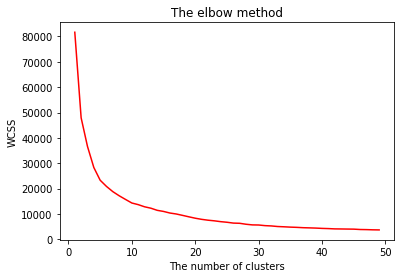

In [48]:
def elbow_kmeans(X):
    wcss = []
    for i in range(1,50):
        if i % 10 == 0:
            print (i)
        kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 500, n_init = 10, random_state = 0)
        kmeans.fit(X)
        wcss.append(kmeans.inertia_) 
    return wcss

wcss = elbow_kmeans(X)
plt.plot(range(1,50), wcss, 'r')
plt.title('The elbow method')
plt.xlabel('The number of clusters')
plt.ylabel('WCSS')
plt.show()

#https://medium.com/@iSunilSV/data-science-python-k-means-clustering-eed68b490e02

## K-Means and Silhouette

For n_clusters = 55 The average silhouette_score is : 0.27107906
For n_clusters = 56 The average silhouette_score is : 0.25837725
For n_clusters = 57 The average silhouette_score is : 0.28490642
For n_clusters = 58 The average silhouette_score is : 0.25671542
For n_clusters = 59 The average silhouette_score is : 0.25734195


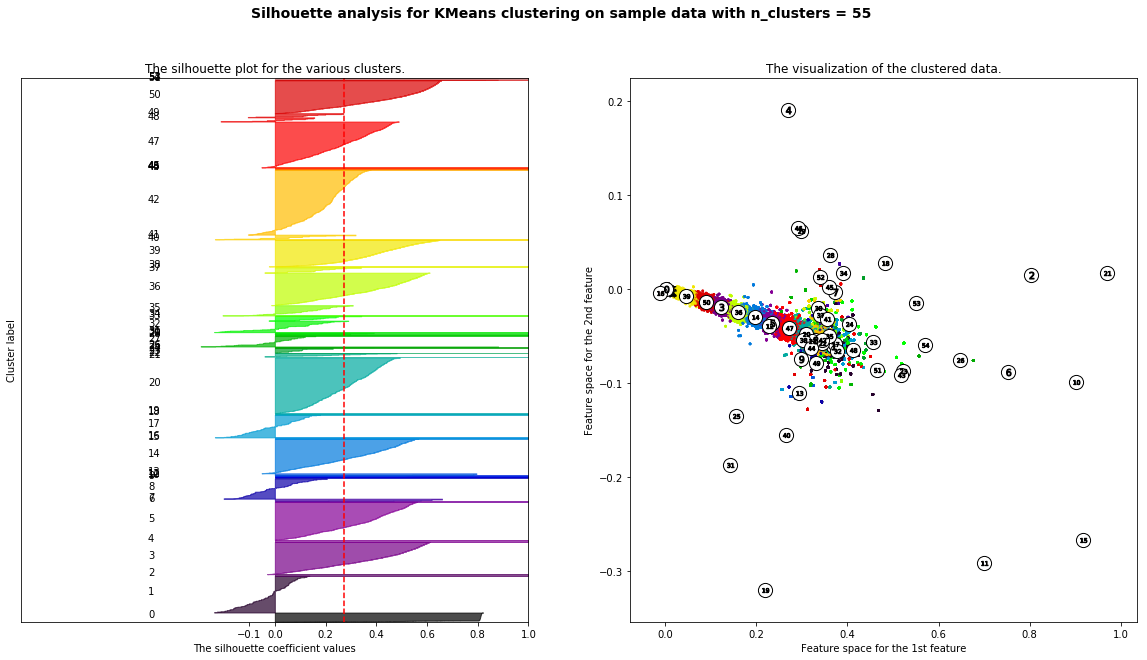

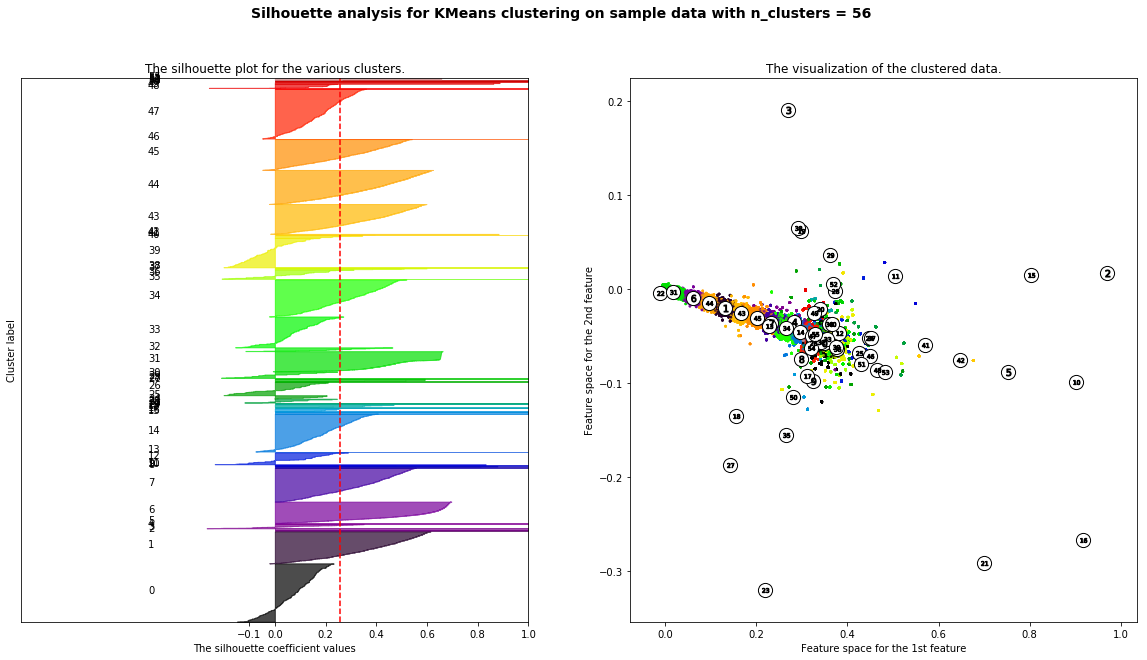

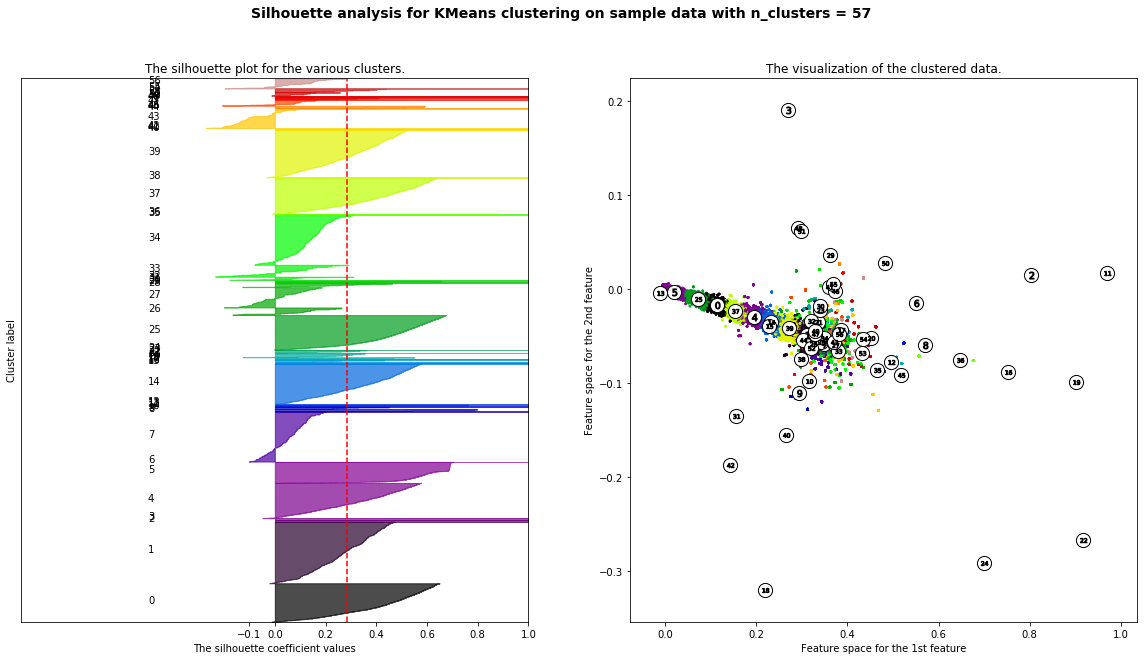

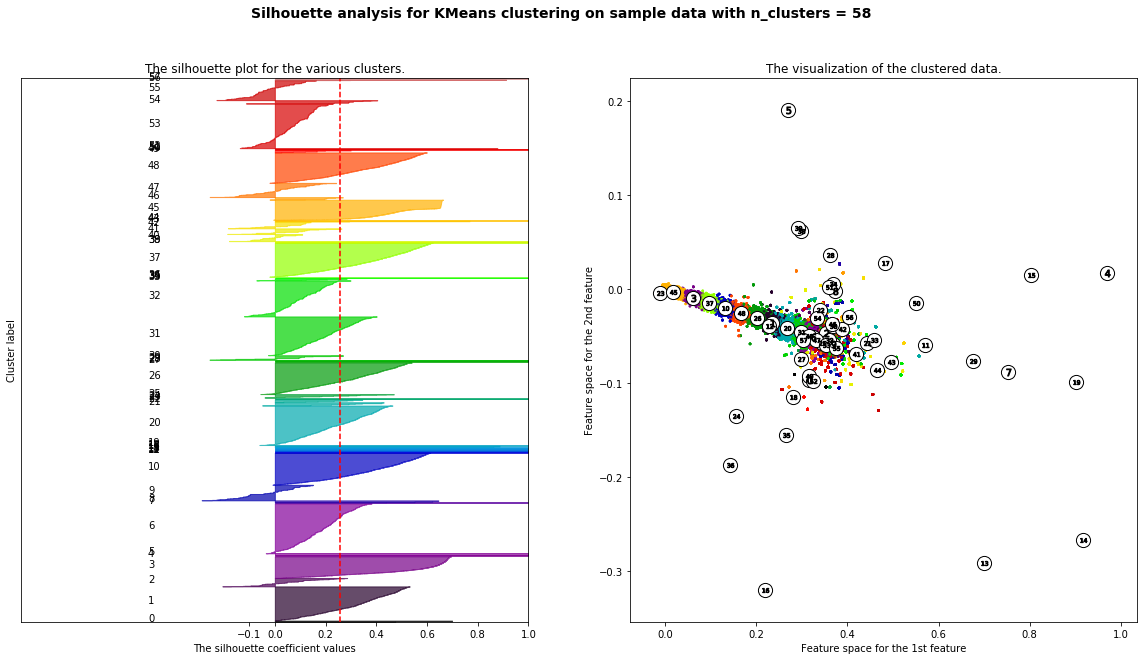

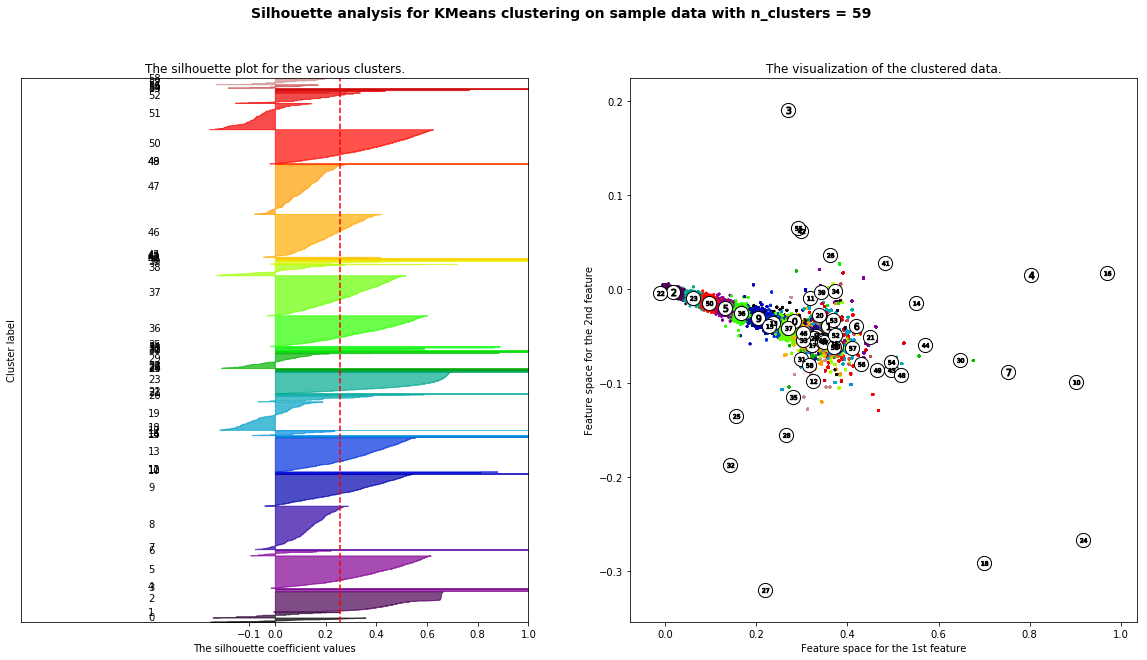

In [4]:
for n_clusters in range(55,60):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(20, 10)

    # The 1st subplot is the silhouette plot
    ax1.set_xlim([-1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.5, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.savefig('SilhouetteAnalysis15.png')